### Introduction to some brief plots


### Basic Plotting Functions in `matplotlib`

In the plots above, notice how to use `ax.scatter()` for generating a scatter plot and `ax.plot()` function for displaying a line plot. It is imperative that data in the right format and dimensions is passed to these functions to avoid any errors or unexpected behaviour in the output. Following is a list of other similar functions which can be readily used for visualizing data. 

    .plot()           Line plot
    .scatter()        Scatter plot
    .bar()	        Vertical bar graph
    .barh()	       Horizontal bar graph
    .axhline()	    Horizontal line across axes
    .vline()	      Vertical line across axes
    .stackplot()	  Stack plot
    
You'll learn more about these functions in upcoming labs and lessons. 

**Commonly used plots**<br>
**[Explore the official documentation for more examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#pie-charts)**<br>
We can create many special types of plots using matplotlib such as histograms, scatter plots, barplots, pie chart and mane more. Few examples are:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# Line Plot

In [8]:
m = np.linspace(0,10,100)

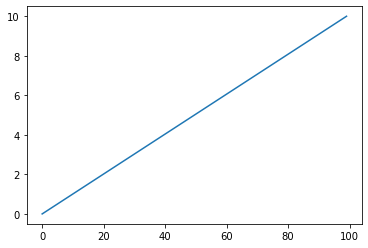

In [9]:
plt.plot(m)
plt.show()

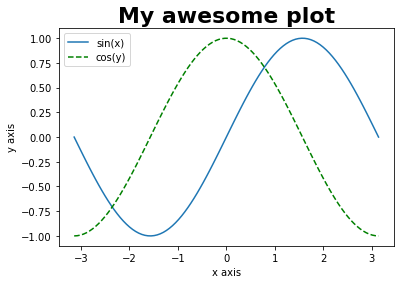

In [95]:
#set up a set of 100 values over +/- pi
x = np.linspace(-np.pi,np.pi,100)

#plot sin(x) versus x
plt.plot(x, np.sin(x),label="sin(x)")
# plt.savefig("sin.png")  # this saves the figure



# let’s add another line, representing cos(theta). We want to control the look of the line:
plt.plot(x, np.cos(x), linestyle="dashed", color="green", label="cos(y)")
# plt.savefig("sin_cos.png")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("My awesome plot", size=22, weight="bold")
plt.legend(loc="best")
plt.show()

## Scatter Plot

Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

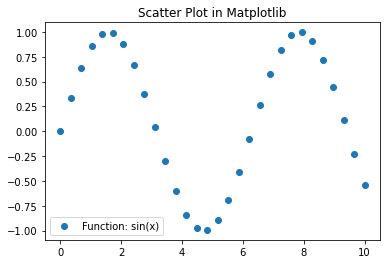

In [97]:
# generate some data -> the sine wave
a = np.linspace(0, 10, 30)
b = np.sin(a)
plt.scatter(a, b, label = "Function: sin(x)" )
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()

# Let's Examining correlation with height and weight 

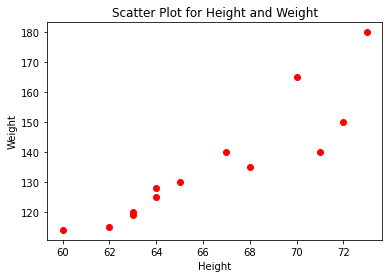

In [99]:
height = [63,62,60,63,64,65,68,67,64,71,72,70,73]
weight = [120,115,114,119,125,130,135,140,128,140,150,165,180]
plt.scatter(height, weight,color = 'r')
plt.title("Scatter Plot for Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

+ Scatterplots, again, are great for examining the relationship between two variables. We can create pair-wise scatterplot for variables in a dataframe if we want to find their the correlations between variables. Later in this course, we will learn about correlation heatmap. 

# We can display data as a scatter plot as well. Let’s show that by simulating some ‘noisy’ data, where we simply perturb the pure sinusoidal signals using Gaussian noise – i.e. using the Numpy normal generator:

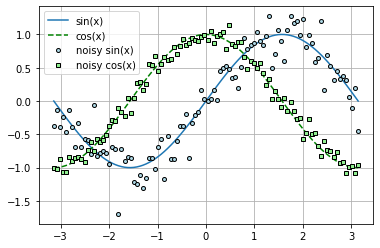

In [100]:
x = np.linspace(-np.pi,np.pi,100)
plt.plot(x, np.sin(x),label="sin(x)")
plt.savefig("sin.png")

plt.plot(x, np.cos(x), linestyle="dashed", color="green", label="cos(x)")
# plt.savefig("sin_cos.png")
plt.legend(loc="best")

#make some noisy data by adding Gaussian noise to the analytic functions
some_random_sin_points = np.sin(x) + np.random.normal(0,0.2, size=100)
some_random_cos_points = np.cos(x) + np.random.normal(0,0.1,size=100)
#plot noisy sin(x)
plt.plot(x,some_random_sin_points,marker="o",linestyle="None",markerfacecolor="lightblue", markeredgecolor="black",markersize=4,label="noisy sin(x)")
#plot noise cos(x)
plt.plot(x,some_random_cos_points,marker="s",linestyle="None",markerfacecolor="lightgreen", markeredgecolor="black",markersize=4,label="noisy cos(x)")

#let’s add a grid for the hell of it
plt.grid()
#update the legend
plt.legend(loc="best")
# plt.savefig("sin_cos_scatter.png")
plt.show()

### 1 Barplots
+ Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

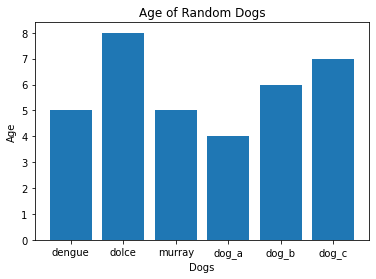

In [111]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"] 
dogs_age =  [5, 8, 5, 4, 6, 7]

plt.bar(range(len(our_dogs)), dogs_age)

ax.set_xticks(range(0,len(our_dogs))) # set ticks values, as a method of the axes
ax.set_xticklabels(our_dogs) # set tick labels, also as a method of the axes

plt.title('Age of Random Dogs')
plt.xlabel('Dogs')
plt.ylabel('Age')
plt.show()

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

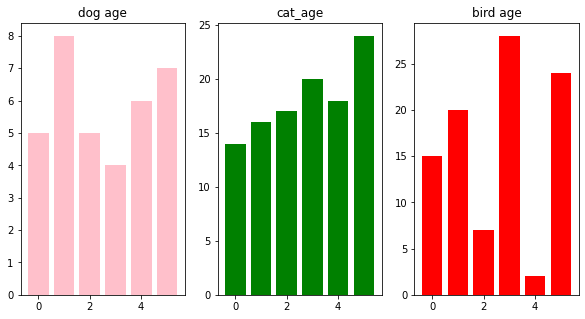

In [114]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
our_birds = ["bird_1", "bird_2", "bird_3", "bird_4", "bird_5", "bird_6"]
cats_age =  [14, 16, 17, 20, 18, 24]
birds_age =  [15, 20, 7, 28, 2, 24]

fig = plt.figure(figsize = (10,5))
ax1 = plt.subplot(1,3,1)
plt.bar(range(len(our_dogs)),dogs_age, color = 'pink')
plt.title('dog age')
plt.subplot(1,3,2)
plt.bar(range(len(our_cats)),cats_age, color = 'green')
plt.title("cat_age")
plt.subplot(1,3,3)
plt.bar(range(len(our_birds)),birds_age, color = 'red')
plt.title('bird age')
plt.show()


# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.


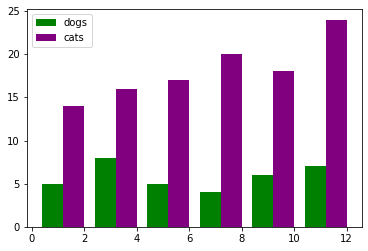

In [115]:
fig = plt.figure()
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
dog_values = [t*element + w*n for element in range(d)] # essentially, this list comprehension gives us the position
# of the position of dogs
plt.bar(dog_values,dogs_age, color='green')
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
cat_values = [t*element + w*n for element in range(d)]
plt.bar(cat_values, cats_age, color = 'purple')
plt.legend(["dogs", "cats"])
n = 1
plt.show()

# Stacked barplots 

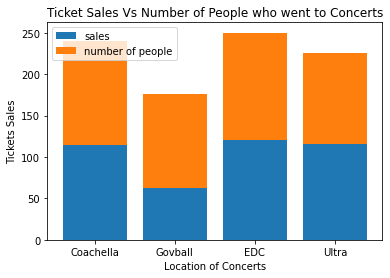

In [118]:
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon =  [114, 62, 120, 116]
people_attended_in_thousands = [126, 114 , 130, 110]

plt.bar(range(len(music_festivals)), ticket_sales_in_millon)
plt.bar(range(len(music_festivals)), people_attended_in_thousands, bottom=ticket_sales_in_millon)

plt.legend(["sales", "number of people"])
ax.set_xticks(range(0,len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.title("Ticket Sales Vs Number of People who went to Concerts")
plt.xlabel("Location of Concerts")
plt.ylabel("Tickets Sales")
plt.show()

# Histogram

+ Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

+ From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

### Comparison of barplots and histogram

<img src="BarplotVsHistogram.png"/>

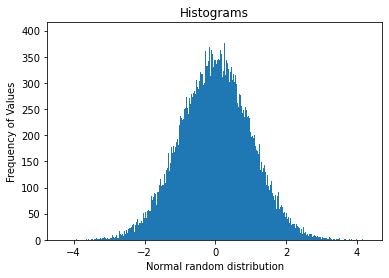

In [101]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
random_normal = np.random.randn(100000)

#Plot the distogram with hist() function
plt.hist(random_normal, bins = 1000)

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

# Overlaid histograms for two distributions

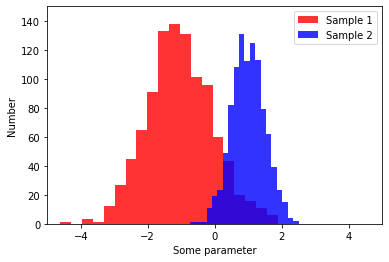

In [102]:
#define the samples
sample1 = np.random.normal(-1,1,size=1000)
sample2 = np.random.normal(1,0.5,size=1000)
#manually set the plot range [xmin, xmax, ymin, ymax]
plt.axis([-5, 5, 0, 150])
#plot the histograms
plt.hist(sample1, bins=20, color="red", alpha=0.8, label="Sample 1")
plt.hist(sample2, bins=20, color="blue", alpha=0.8, label="Sample 2")
#set out labels
plt.xlabel("Some parameter")
plt.ylabel("Number")
#add a legend
plt.legend(loc="upper right")
#save the plot
# plt.savefig("hist.png")
plt.show()

# Plotting two histograms 


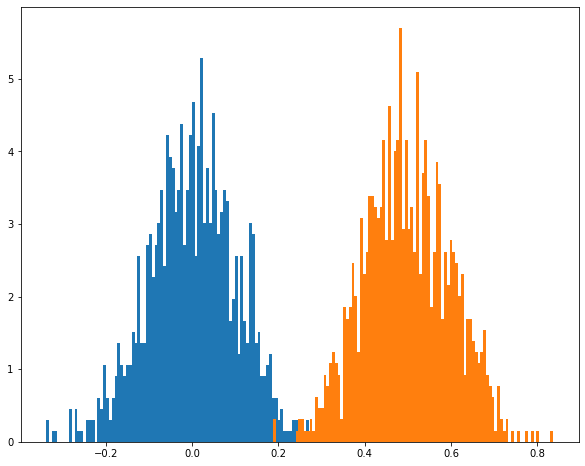

In [103]:
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.5, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize = (10,8))
plt.hist(s1, bins = 100, density = True,)
plt.hist(s2, bins = 100, density = True,)
plt.show()

## Subplots

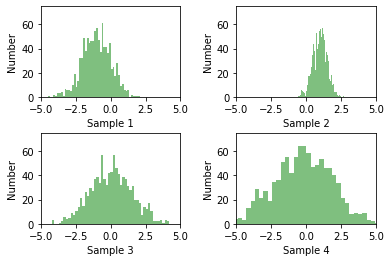

In [104]:
#four random samples

sample1 = np.random.normal(-1,1,size=1000)
sample2 = np.random.normal(1,0.5,size=1000)
sample3 = np.random.normal(0,1.5,size=1000)
sample4 = np.random.normal(-0.2,2,size=1000)
#put these in an iterable list
data = [sample1,sample2,sample3,sample4]
#use the subplots_adjust function to make a bit more space between the plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
#now loop over the data list
for i,d in enumerate(data):
    plt.subplot(2,2,i+1)
    plt.axis([-5, 5, 0, 75])
    plt.hist(d,bins=50, color="green", alpha=0.5)
    plt.xlabel("Sample "+str((i+1)))
    plt.ylabel("Number")
# plt.savefig("sub_plots.png")
plt.show()

# Set Styles

In [105]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Kernel Density Estimate
A Kernel Density Estimate, or KDE, is an approximation of the proba- bility distribution of a random variable. In the examples above we saw how to plot the distribution of a random variable using histograms. Histograms present discrete ‘counts’ or frequency within intervals spanning the range of values of the data. A KDE provides a continu- ous, smooth estimate of the probability density of drawing a given value from a distribution.

Let’s say we were drawing samples (x1, x2, ..., xn) from a distribu- tion. Let the probability density of that distribution be p(x). We don’t know what p(x) is, but we can estimate it as follows:
          1∑n 􏰀x−xi􏰁
          p(x) ≈ nh K h (1.1)
i=1
Here h is called the ‘bandwidth’, where h > 0, and K is the kernel, which is a function. Different kernels can be used, but a common one is the Normal distribution. The bandwidth can be tuned as a free parameter: too small and it will not sample the data well enough, but too large and the KDE will be over-smoothed. A rule of thumb for univariate data is to set h = 1.06σ/n0.2, where σ is the standard deviation of the sample.
A simple implementation of applying a Normal (or Gaussian) KDE in Python is via the scipy module:

In [106]:
from scipy import stats

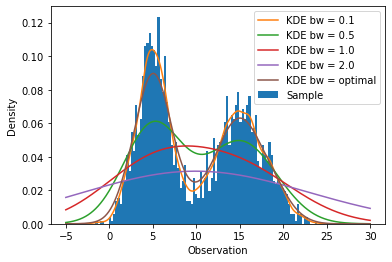

In [108]:
# Generate two random samples from a Normal distribution
Sample1 = np.random.normal(5,2,1000)
Sample2 = np.random.normal(15,3,1000)

# Make into one big sample
Sample = np.concatenate((Sample1,Sample2))

# Plot the histogram
plt.hist(Sample, bins=100, density=True, label="Sample")

# Define a continuous set of x values
xs = np.linspace(-5,30,1000)

# Loop over some example bandwidths
for bw in [0.1,0.5,1,2]:
# Calculate the KDE with a fixed bw
     kde = stats.gaussian_kde(Sample, bw_method=bw) # Plot the KDE
     plt.plot(xs,kde(xs),label='KDE bw = %.1f'%bw)

# Also show the default optimal bw
kde = stats.gaussian_kde(Sample) 
plt.plot(xs, kde(xs), label='KDE bw = optimal')
plt.xlabel("Observation") 
plt.ylabel("Density") 
plt.legend()
plt.show()

+ In the above example we create a sample of data with two peaks in the distribution by drawing from two independent Normal distributions.
+ We plot the histogram and KDE. Note that we use the ‘density’ option of the hist() function:
   
+ We calcuate the KDE using different bandwidths – notice the ef- fect on the resultant curves. Unless you specifically want to set the bandwidth, it is probably best to go with the default, which aims to optimize the bandwidth based on the sample. 

# Box and Whisker
+ Box plots can illustrate the quartile range, median and total range of a sample of data. The quartiles can be labelled: Q1 (25% percentile, or lower quartile), Q2 (50% percentile, or median), Q3 (75% percentile, or upper quartile).

+ The interquartile range (IQR) is defined Q3 − Q1. To construct our boxplot we draw it spanning Q1 to Q3, and indicate Q2 with a line through the box. ‘Whiskers’ extend either side of the box, and can be used to indicate the maximum and minimum values, or alternatively some percentile range beyond Q1 and Q3.

+ For example, the 16% and 84% percentiles representing the ‘1σ’ range.

+ An important point to note is that box and whisker plots show distributions with ‘outliers’ removed. The outliers are usually shown as separate points.

+ There are different ways to define a statistical outlier in a data set, but often one can use a ‘σ-clip’, whereby an outlier is defined as any point with a value some multiple of standard deviations away from the mean.

+ Let’s see how we can implement box and whisker plots with matplotlib. Taking the two individual samples from the KDE exam- ple::
+ Box and whisker plots can be drawn horizontally or vertically.


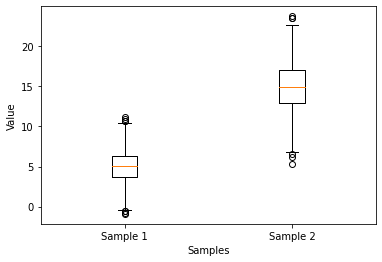

In [109]:
# Two samples
sample_1 = np.random.normal(5,2,1000)
sample_2 = np.random.normal(15,3,1000)

plt.boxplot([sample_1, sample_2],
labels=["Sample 1", "Sample 2"])
# A little bit of decoration
plt.ylabel("Value")
plt.xlabel("Samples")
plt.show()

+ 
We haven’t customised the plot much here, but there are various options for defining the length of the whiskers, what defines an outlier, whether to show vertical or horizontal boxes and so-on. You should experiment with playing around with the settings to see the effect on the box and whisker plot.

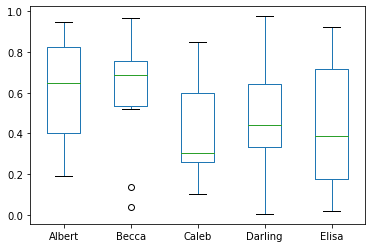

In [120]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['Albert', 'Becca', 'Caleb', 'Darling', 'Elisa'])
df.plot.box()
plt.show()

### We can add a bit of colours to the boxplots as below

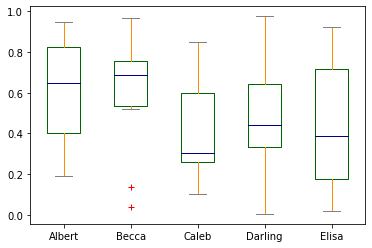

In [121]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
            'medians': 'DarkBlue', 'caps': 'Gray'}

df.plot.box(color=color, sym='r+')
plt.show()

## Violin plots
+ A violin plot can be thought of as a combination of a box plot and KDE plot. Box plots significantly reduce the amount of information shown about a distribution by only representing the range and quartiles (or percentiles) – i.e. summary statistics. Violin plots show the KDE, which is of course a representation of the full probability distribution of the data. Again, we can plot these easily with matplotlib. Using the same two samples as above:

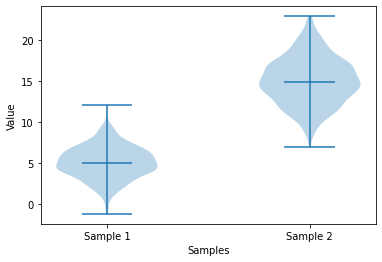

In [110]:
# Two samples again
samples1 = np.random.normal(5,2,1000)
samples2 = np.random.normal(15,3,1000)
# Use subplots to return an axis object for
# better control
fig, ax = plt.subplots(1,1)
# Like boxplot, supply samples as sequence and show medians
ax.violinplot([samples1,samples2],
showmedians=True)
# Modify the default axis labelling
ax.set_xticks([1,2])
ax.set_xticklabels(["Sample 1", "Sample 2"])
plt.xlabel("Samples")
plt.ylabel("Value")
plt.show()

+ Okay, they don’t look that much like violins, but you get the idea. Here we are also showing the position of the median, and the ex- tremes of the distributions. The shaded regions are the KDEs of the distributions, reflected about the vertical axis. You can control how the KDE is calculated in a similar manner to the example above, for example by supplying a given bandwidth as an argument to violin(). Of course, you can also modify the fine detail of how the plots look in terms of colour, line styles, etc.

## Practice Exercise

In [124]:
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/london2018.csv')
weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [ ]:
# Create a new columns for the median Temperature

In [132]:
weather['Tmed'] = (weather['Tmax'] + weather['Tmin'])/2

In [133]:
# Check result
weather.head(2)

,Year,Month,Tmax,Tmin,Rain,Sun,Tmed
0,2018,1,9.7,3.8,58.0,46.5,6.75
1,2018,2,6.7,0.6,29.0,92.0,3.65


In [ ]:
# Plot both the Min and Max Temperature

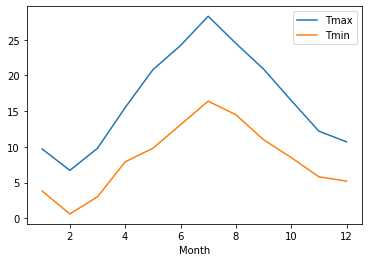

In [131]:
weather.plot(x="Month" , y=["Tmax","Tmin"])
plt.show()

# Bar Plot

In [140]:
weather["Month"].dtypes

dtype('int64')

In [143]:
names_of_months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep'
     ,10:'Oct',11:'Nov',12:'Dec'}

In [144]:
weather["Name_of_Month"] = weather["Month"].map(names_of_months)

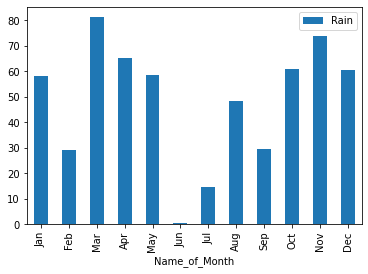

In [145]:
weather.plot(kind='bar', y='Rain', x="Name_of_Month")
plt.show()

In [125]:
weather.to_csv("Londonweather2018.csv")

In [126]:
weather1957 = pd.read_csv("https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv")

In [127]:
weather1957.to_csv("LondonHistoricWeather.csv")

In [ ]:
df = pandas.read_excel('heathrow.xlsx')

In [ ]:
## Useful links for more plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [ ]:
## Useful links for data to plractice more plots

## Summary

This lesson provided you with some more experience with plotting in `matplotlib`. You saw how to draw plots with default objects settings vs. plotting with object definitions. You learned to apply labels and titles to the plots to provide them context for an improved understanding. The lesson provided ways to draw multiple plots within the same figure by using absolute and relative definitions. The lesson then ended by providing a quick reference list to some styling techniques and further plotting functions which will be discussed in detail later. 